In [1]:
import numpy as np
import pandas as pd

### Finding the required data from the boston house pricing prediction dataset.

In [2]:
from sklearn import datasets
data = datasets.load_boston()

C:\Users\shobh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
df = pd.DataFrame(data.data)

In [4]:
df.columns = data.feature_names
df['target'] = data.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
res_df = df[["CRIM","RM","target"]].copy()

In [7]:
# finally I have got a dataframe with the features as 'CRIM' and 'RM'
# then target as 'target' which are actually the prices of the house.

res_df

,CRIM,RM,target
0,0.00632,6.575,24.0
1,0.02731,6.421,21.6
2,0.02729,7.185,34.7
3,0.03237,6.998,33.4
4,0.06905,7.147,36.2
...,...,...,...
501,0.06263,6.593,22.4
502,0.04527,6.120,20.6
503,0.06076,6.976,23.9
504,0.10959,6.794,22.0


In [8]:
# Applying preprosessing on the features

from sklearn.preprocessing import MinMaxScaler

mx = MinMaxScaler()

X_scaled = mx.fit_transform(res_df.drop(['target'], axis=1))

In [9]:
X_scaled.shape

(506, 2)

In [10]:
Y = np.array(res_df.target)

In [11]:
Y.shape

(506,)

In [12]:
# visualize the data
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Graph b/w crime rate and pricing')

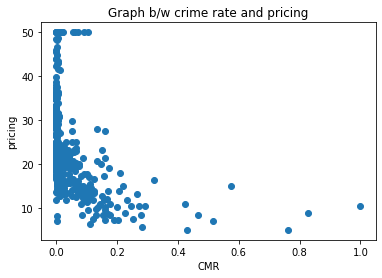

In [13]:
plt.scatter(X_scaled[:,0],Y)
plt.xlabel('CMR')
plt.ylabel('pricing')
plt.title('Graph b/w crime rate and pricing')

Text(0.5, 1.0, 'Graph b/w avg no. of rooms and pricing')

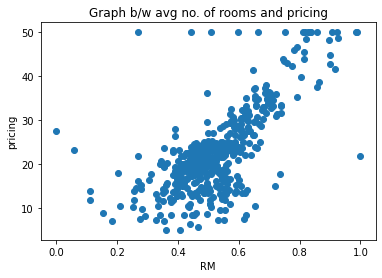

In [14]:
plt.scatter(X_scaled[:,1],Y)
plt.xlabel('RM')
plt.ylabel('pricing')
plt.title('Graph b/w avg no. of rooms and pricing')

### Developing a function for the Batch Stochastic gradient descent

In batch stochastic gradient descent in each itration or epoch we take the whole dataset and then evaluate the loss, weights and bias. Although this is a nice way of finding out the weights and bias but it's gonna be computationally very expensive when we are dealing with a big data as in each epoch we loads the whole data set.

In [15]:
def BatchSGD(X,Y_true, epoch, learning_rate = 0.01):
    w = np.array([1,1]) # initializing the weights to 1.
    b = 0 # initializing the bias to 0.
    n = len(X) # n is the total no. of samples.
    lt = []
    
    for i in range(epoch):
        # Y_predicted = w1*CMR + w2*RM + b
        Y_predicted = np.dot(X,w) + b
        
        w1 = (-2/n)*(np.sum(X[:,0]*(Y_true - Y_predicted))) # it is partial differential of loss function wrt w1.
        w2 = (-2/n)*(np.sum(X[:,1]*(Y_true - Y_predicted))) # it is partial differential of loss function wrt w2.
        b1 = (-2/n)*(np.sum(Y_true - Y_predicted)) # it is partial differential of loss function wrt b.
        
        b = b - (learning_rate*b1) # updating the bias.
        w = np.array([ w[0]-(learning_rate*w1), w[1]-(learning_rate*w2) ]) # updating the weights.
        
        loss = (1/n)*(np.sum((Y_true - Y_predicted)*(Y_true - Y_predicted))) # This Mean squared error loss function
        
        # this will record the loss after every 10th epoch or iteration.
        if i%10 == 0:
            lt.append(loss)
            
    return w,b,lt

In [16]:
w,b,lt = BatchSGD(X_scaled, Y, epoch=500)
w,b

(array([-1.49954071, 15.18975866]), 14.89790714165941)

Text(0.5, 1.0, 'Graph b/w no. of epoches and loss function values')

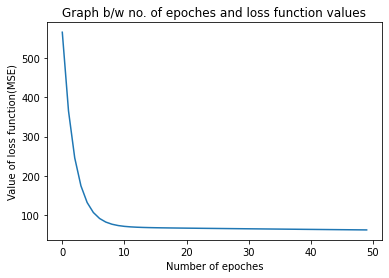

In [17]:
plt.plot(np.arange(len(lt)), lt)
plt.xlabel('Number of epoches')
plt.ylabel('Value of loss function(MSE)')
plt.title('Graph b/w no. of epoches and loss function values')

### Developing function for the stochastic gradient descent

In stochastic gradient descent we randomly take one sample from the data set in each epoch and it is not computationally that much expensive as in each epoch or iteration it takes only one sample.

In [34]:
def SGD(X,Y_true,epoch,learning_rate=0.01):
    w = np.array([1,1]) # initializing the weights to 1.
    b = 0 # initializing the bias to 0.
    n = len(X) # n is the total no. of samples.
    lt = []
    
    for i in range(epoch):
        target = np.random.randint(0,n-1)
        
        # Y_predicted = w1*CMR + w2*RM + b
        Y_predicted = w[0]*X_scaled[target][0] + w[1]*X_scaled[target][1] + b
        
        w1 = (-2/n)*(X_scaled[target][0]*(Y_true[target] - Y_predicted))
        w2 = (-2/n)*(X_scaled[target][1]*(Y_true[target] - Y_predicted))
        b1 = (-2/n)*(Y_true[target]-Y_predicted)
        
        b = b - (learning_rate*b1) # updating the bias.
        w = np.array([ w[0]-(learning_rate*w1), w[1]-(learning_rate*w2) ]) # updating the weights.
        
        loss = ((Y_true[target] - Y_predicted)*(Y_true[target] - Y_predicted))
        
        # this will record the loss after every 10th epoch or iteration.
        if i%100 == 0:
            lt.append(loss)
        
            
    return w,b,lt
        

In [37]:
w,b,lt = SGD(X_scaled, Y, epoch=100000)

Text(0.5, 1.0, 'Graph b/w no. of epoches and loss function values')

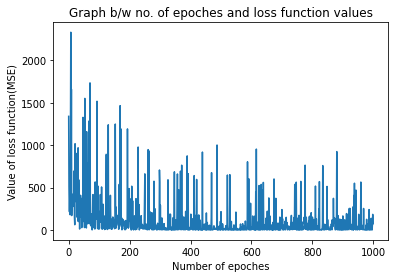

In [40]:
plt.plot(np.arange(len(lt)), lt)
plt.xlabel('Number of epoches')
plt.ylabel('Value of loss function(MSE)')
plt.title('Graph b/w no. of epoches and loss function values')

In [39]:
w,b

(array([ 0.36682389, 12.26085756]), 16.28393871607582)